In [1]:
!pip install pandas pyarrow

In [2]:
#Install requirements

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#Read the data
data = pd.read_parquet('/Users/monikarajput/Documents/personal_project/tamoco/sample_data.snappy.parquet')

In [4]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512420 entries, 0 to 512419
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   FILENAME            512420 non-null  object        
 1   FILE_ROW_NUMBER     512420 non-null  object        
 2   ACCOUNT_ID          512420 non-null  object        
 3   APP_ID_IOS          512420 non-null  object        
 4   APP_ID_ANDROID      512420 non-null  object        
 5   CREATED_DATE        512420 non-null  datetime64[ns]
 6   EVENT_DATE          512420 non-null  datetime64[ns]
 7   EVENT_EPOCH         512420 non-null  object        
 8   DEVICE_ID           512420 non-null  object        
 9   DEVICE_TYPE         512420 non-null  object        
 10  DEVICE_OS           512390 non-null  object        
 11  DEVICE_OS_VERSION   188893 non-null  object        
 12  DEVICE_MAKE         208891 non-null  object        
 13  DEVICE_MODEL        208891 no

In [5]:
#View the Data
data.head()

,FILENAME,FILE_ROW_NUMBER,ACCOUNT_ID,APP_ID_IOS,APP_ID_ANDROID,CREATED_DATE,EVENT_DATE,EVENT_EPOCH,DEVICE_ID,DEVICE_TYPE,...,IS_BIDSTREAM,IS_GB_ALLOWED,CONSENT_STATUS,COUNTRY,REGION,TIMEZONE,LOCAL_TIME,IS_GEOHASH_MATCHED,IAB_CONSENT_STATUS,APP_ID
0,dataset=location-observations-with-accuracy/pa...,201445,285,2596,2597,2021-11-06 23:24:34.713,2021-11-06 18:55:23,1636224923,d2f799e1-0c13-4b7c-81e9-f909c3498ee2,PHONE,...,False,False,True,US,IL,America/Chicago,2021-11-06 13:55:23,True,None,None
1,dataset=location-observations-with-accuracy/pa...,111132,285,2596,2597,2021-11-06 23:24:34.713,2021-11-06 18:44:04,1636224244,ec800b73-5064-4d57-92dc-7b705cd15d52,PHONE,...,False,False,True,US,IL,America/Chicago,2021-11-06 13:44:04,True,None,None
2,from_td/prod/location/US/2021/11/06/09/part-00...,5052755,286,2596,2597,2021-11-06 23:24:31.704,2021-11-06 00:58:38,1636160318,49d49b75-29c0-4c0e-a522-92ea7e130d72,UNKNOWN_DEVICE,...,False,False,True,US,IL,America/Chicago,2021-11-05 19:58:38,True,None,17
3,dataset=location-observations-with-accuracy/pa...,119299,285,2596,2597,2021-11-06 23:24:34.713,2021-11-06 21:02:11,1636232531,1f0a7f35-e548-44f9-8d06-47ff9ea2c34a,PHONE,...,False,False,True,US,IL,America/Chicago,2021-11-06 16:02:11,True,None,None
4,from_td/prod/location/US/2021/11/06/09/part-00...,3513327,286,2596,2597,2021-11-06 23:24:31.704,2021-11-06 01:57:16,1636163836,7f3ae2fb-a022-49b2-a65b-d0ebb75b78b8,UNKNOWN_DEVICE,...,False,False,True,US,IL,America/Chicago,2021-11-05 20:57:16,True,None,17


1. Remove the unnecessary columns and duplicated pings in the data set (data cleaning).
2. Find the location and time range of data.
3. Calculate the average number of pings per device.
4. Plot the distribution of accuracy of android devices.
5. Find the hour in which devices sent the most pings.
6. Find the number of redundant pings in the data set. If a device sends more than 2 pings with a
rate greater than 1 ping/hour from the same location (the same latitude/longitude), pings except the first and last ones are redundant.

### 1. Remove the unnecessary columns and duplicated pings in the data set (data cleaning).

In [23]:
#Remove unnecessary columns
df = data.drop(columns=['FILENAME', 'FILE_ROW_NUMBER', 'EVENT_EPOCH', 'DEVICE_MAKE',
                   'DEVICE_MODEL', 'CARRIER', 'ALTITUDE', 'IAB_CONSENT_STATUS', 'APP_ID'])
df = df.drop_duplicates()

In [24]:
df.head()

,ACCOUNT_ID,APP_ID_IOS,APP_ID_ANDROID,CREATED_DATE,EVENT_DATE,DEVICE_ID,DEVICE_TYPE,DEVICE_OS,DEVICE_OS_VERSION,LATITUDE,...,IP,GEOHASH_6,IS_BIDSTREAM,IS_GB_ALLOWED,CONSENT_STATUS,COUNTRY,REGION,TIMEZONE,LOCAL_TIME,IS_GEOHASH_MATCHED
0,285,2596,2597,2021-11-06 23:24:34.713,2021-11-06 18:55:23,d2f799e1-0c13-4b7c-81e9-f909c3498ee2,PHONE,Android,8.0.0,41.549549,...,69.245.245.139,dp3s7e,False,False,True,US,IL,America/Chicago,2021-11-06 13:55:23,True
1,285,2596,2597,2021-11-06 23:24:34.713,2021-11-06 18:44:04,ec800b73-5064-4d57-92dc-7b705cd15d52,PHONE,Android,10,41.546689,...,73.209.146.221,dp3s7e,False,False,True,US,IL,America/Chicago,2021-11-06 13:44:04,True
2,286,2596,2597,2021-11-06 23:24:31.704,2021-11-06 00:58:38,49d49b75-29c0-4c0e-a522-92ea7e130d72,UNKNOWN_DEVICE,Android,None,41.547140,...,172.58.190.143,dp3s7e,False,False,True,US,IL,America/Chicago,2021-11-05 19:58:38,True
3,285,2596,2597,2021-11-06 23:24:34.713,2021-11-06 21:02:11,1f0a7f35-e548-44f9-8d06-47ff9ea2c34a,PHONE,Android,11,41.549143,...,98.228.0.54,dp3s7e,False,False,True,US,IL,America/Chicago,2021-11-06 16:02:11,True
4,286,2596,2597,2021-11-06 23:24:31.704,2021-11-06 01:57:16,7f3ae2fb-a022-49b2-a65b-d0ebb75b78b8,UNKNOWN_DEVICE,Android,None,41.548166,...,98.228.5.81,dp3s7e,False,False,True,US,IL,America/Chicago,2021-11-05 20:57:16,True


### 2. Find the location and time range of data.

In [8]:
min_latitude = df['LATITUDE'].min()
max_latitude = df['LATITUDE'].max()
min_longitude = df['LONGITUDE'].min()
max_longitude = df['LONGITUDE'].max()

print('Location range:')
print('Latitude:', min_latitude, 'to', max_latitude)
print('Longitude:', min_longitude, 'to', max_longitude)


df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'])
min_event_date = df['EVENT_DATE'].min()
max_event_date = df['EVENT_DATE'].max()

print('Time range:')
print('From:', min_event_date)
print('To:', max_event_date)

Location range:
Latitude: 40.781801 to 42.187484
Longitude: -88.593702 to -87.187553
Time range:
From: 2021-11-06 00:00:00
To: 2021-11-06 23:00:59


### 3. Calculate the average number of pings per device.

In [9]:
average_pings_per_device = df.groupby('DEVICE_ID').size().mean()
print('Average number of pings per device:', average_pings_per_device)


Average number of pings per device: 6.3178432903329735


### 4. Plot the distribution of accuracy of android devices.

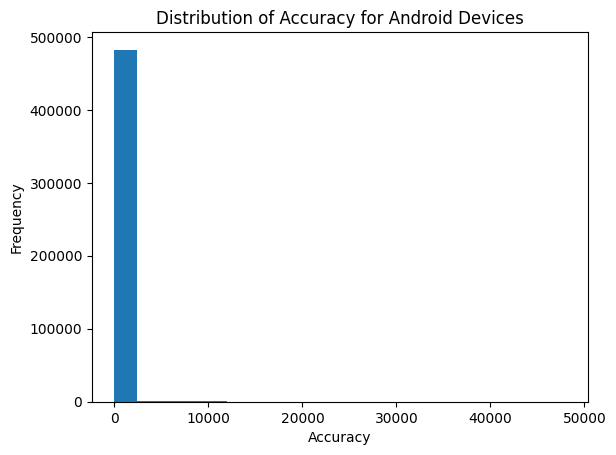

In [22]:
android_df = df[df['DEVICE_OS'] == 'Android']

# Access the ACCURACY column for Android devices
accuracy_android = android_df['ACCURACY']

# Create a histogram of accuracy values
plt.hist(accuracy_android, bins=20)  # Adjust the number of bins as needed
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy for Android Devices')
plt.show()

### 5. Find the hour in which devices sent the most pings

In [21]:
df['HOUR'] = df['EVENT_DATE'].dt.hour

# Count the occurrences of each hour
hour_counts = df['HOUR'].value_counts()

# Identify the hour with the highest count
hour_with_most_pings = hour_counts.idxmax()

# Print the hour with the most pings
print("Hour with the most pings:", hour_with_most_pings)

Hour with the most pings: 21


### 6. Find the number of redundant pings in the data set. If a device sends more than 2 pings with a rate greater than 1 ping/hour from the same location (the same latitude/longitude), pings except the first and last ones are redundant.

In [13]:
import pandas as pd
from datetime import timedelta

# Group the dataset by DEVICE_ID, LATITUDE, and LONGITUDE
grouped = df.groupby(['DEVICE_ID', 'LATITUDE', 'LONGITUDE'])

redundant_pings = 0

# Iterate over each group
for _, group in grouped:
    # Sort the pings by EVENT_DATE in ascending order
    sorted_group = group.sort_values('EVENT_DATE')

    # Calculate the time difference between consecutive pings
    time_diff = sorted_group['EVENT_DATE'].diff()

    # Identify pings with time difference greater than 1 hour
    redundant_pings_mask = time_diff > timedelta(hours=1)

    # Remove the first and last pings
    redundant_pings_mask.iloc[0] = False
    redundant_pings_mask.iloc[-1] = False

    # Count the remaining redundant pings
    redundant_pings += redundant_pings_mask.sum()

# Print the total number of redundant pings
print("Total redundant pings:", redundant_pings)


Total redundant pings: 7503
